In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ClassificationReport

In [2]:
avaliacao_indicadores = pd.read_csv("C:/Users/Spaox/Documents/Projeto/Arquivos/Tabelas/Exportadas/terrorismo_indicadores.csv", sep=';', encoding='latin-1')

In [3]:
avaliacao_indicadores

id id_evento   ano  mes  dia nome_continente  codigo_pais  \
0      89706  2,02E+11  2018   11   12            Asia            4   
1       1868  2,01E+11  2010    6   20            Asia            4   
2      82573  2,02E+11  2018    2    5            Asia            4   
3      12621  2,01E+11  2012    6   16            Asia            4   
4      89748  2,02E+11  2018   11   15            Asia            4   
...      ...       ...   ...  ...  ...             ...          ...   
90750  77189  2,02E+11  2017    7   19          Africa          231   
90751  18170  2,01E+11  2013    2   23          Africa          231   
90752  76981  2,02E+11  2017    7   12          Africa          231   
90753  77198  2,02E+11  2017    7   19          Africa          231   
90754  18547  2,01E+11  2013    3   11          Africa          231   

         nome_pais iso  codigo_regiao  ... faixa_idh indice_idh_regiao  \
0      Afghanistan  AF              6  ...       Low     Below Average   
1      Afghanistan  AF              6  ...       Low     Below Average   
2      Afghanistan  AF              6  ...       Low     Below Average   
3      Afghanistan  AF              6  ...       Low     Below Average   
4      Afghanistan  AF              6  ...       Low     Below Average   
...            ...  ..            ...  ...       ...               ...   
90750     Zimbabwe  ZW             11  ...    Medium     Above Average   
90751     Zimbabwe  ZW             11  ...       Low     Above Average   
90752     Zimbabwe  ZW             11  ...    Medium     Above Average   
90753     Zimbabwe  ZW             11  ...    Medium     Above Average   
90754     Zimbabwe  ZW             11  ...       Low     Above Average   

      indice_idh_continente  indice_idh_mundo  indice_ctrlcorrupcao_rank  \
0             Below Average     Below Average                       4.81   
1             Below Average     Below Average                       0.95   
2             Below Average     Below Average                       4.81   
3             Below Average     Below Average                       2.37   
4             Below Average     Below Average                       4.81   
...                     ...               ...                        ...   
90750         Above Average     Below Average                       9.62   
90751         Above Average     Below Average                       3.32   
90752         Above Average     Below Average                       9.62   
90753         Above Average     Below Average                       9.62   
90754         Above Average     Below Average                       3.32   

       indice_ctrlcorrupcao  indice_efetividadegov_rank indice_efetividadegov  \
0                  Low Rank                        8.17              Low Rank   
1                  Low Rank                        4.78              Low Rank   
2                  Low Rank                        8.17              Low Rank   
3                  Low Rank                        6.64              Low Rank   
4                  Low Rank                        8.17              Low Rank   
...                     ...                         ...                   ...   
90750              Low Rank                       11.06              Low Rank   
90751              Low Rank                        9.48              Low Rank   
90752              Low Rank                       11.06              Low Rank   
90753              Low Rank                       11.06              Low Rank   
90754              Low Rank                        9.48              Low Rank   

       indice_estpolitica_rank  indice_estpolitica  
0                         0.47            Low Rank  
1                         1.42            Low Rank  
2                         0.47            Low Rank  
3                         1.90            Low Rank  
4                         0.47            Low Rank  
...                        ...                 ...  
90750      

In [4]:
dataset_avaliacao_indicadores = avaliacao_indicadores[['nome_regiao', 'regime_politico','indice_divisao_etnica','religiao_predominante', 'religiao_secundaria', 'indice_desemprego_regiao', 'indice_educacao_regiao', 'indice_expvida_regiao', 'faixa_idh', 'indice_idh_regiao', 'indice_ctrlcorrupcao', 'indice_efetividadegov', 'indice_estpolitica', 'ano', 'mes', 'dia']].copy()

In [5]:
dataset_avaliacao_indicadores

nome_regiao      regime_politico indice_divisao_etnica  \
0              South Asia  electoral autocracy            High Index   
1              South Asia  electoral autocracy            High Index   
2              South Asia  electoral autocracy            High Index   
3              South Asia  electoral autocracy            High Index   
4              South Asia  electoral autocracy            High Index   
...                   ...                  ...                   ...   
90750  Sub-Saharan Africa  electoral autocracy             Low Index   
90751  Sub-Saharan Africa  electoral autocracy             Low Index   
90752  Sub-Saharan Africa  electoral autocracy             Low Index   
90753  Sub-Saharan Africa  electoral autocracy             Low Index   
90754  Sub-Saharan Africa  electoral autocracy             Low Index   

      religiao_predominante religiao_secundaria indice_desemprego_regiao  \
0                   Muslims          Christians            Above Average   
1                   Muslims          Christians            Above Average   
2                   Muslims          Christians            Above Average   
3                   Muslims          Christians            Above Average   
4                   Muslims          Christians            Above Average   
...                     ...                 ...                      ...   
90750            Christians      Folk Religions            Below Average   
90751            Christians      Folk Religions            Below Average   
90752            Christians      Folk Religions            Below Average   
90753            Christians      Folk Religions            Below Average   
90754            Christians      Folk Religions            Below Average   

      indice_educacao_regiao indice_expvida_regiao faixa_idh  \
0              Below Average         Below Average       Low   
1              Below Average         Below Average       Low   
2              Below Average         Below Average       Low   
3              Below Average         Below Average       Low   
4              Below Average         Below Average       Low   
...                      ...                   ...       ...   
90750          Above Average         Below Average    Medium   
90751          Above Average         Below Average       Low   
90752          Above Average         Below Average    Medium   
90753          Above Average         Below Average    Medium   
90754          Above Average         Below Average       Low   

      indice_idh_regiao indice_ctrlcorrupcao indice_efetividadegov  \
0         Below Average             Low Rank              Low Rank   
1         Below Average             Low Rank              Low Rank   
2         Below Average             Low Rank              Low Rank   
3         Below Average             Low Rank              Low Rank   
4         Below Average             Low Rank              Low Rank   
...                 ...                  ...                   ...   
90750     Above Average             Low Rank              Low Rank   
90751     Above Average             Low Rank              Low Rank   
90752     Above Average             Low Rank              Low Rank   
90753     Above Average             Low Rank              Low Rank   
90754     Above Average             Low Rank              Low Rank   

      indice_estpolitica   ano  mes  dia  
0               Low Rank  2018   11   12  
1               Low Rank  2010    6   20  
2               Low Rank  2018    2    5  
3               Low Rank  2012    6   16  
4               Low Rank  2018   11   15  
...                  ...   ...  ...  ...  
90750           Low Rank  2017    7   19  
90751           Low Rank  2013    2   23  
90752           Low Rank  2017    7   12  
90753           Low Rank  2017    7   19  
90754           Low Rank  2013    3   11  

[90755 rows x 16 columns]

In [6]:
dataset_avaliacao_indicadores.head(10)

nome_regiao      regime_politico indice_divisao_etnica  \
0  South Asia  electoral autocracy            High Index   
1  South Asia  electoral autocracy            High Index   
2  South Asia  electoral autocracy            High Index   
3  South Asia  electoral autocracy            High Index   
4  South Asia  electoral autocracy            High Index   
5  South Asia  electoral autocracy            High Index   
6  South Asia  electoral autocracy            High Index   
7  South Asia  electoral autocracy            High Index   
8  South Asia  electoral autocracy            High Index   
9  South Asia  electoral autocracy            High Index   

  religiao_predominante religiao_secundaria indice_desemprego_regiao  \
0               Muslims          Christians            Above Average   
1               Muslims          Christians            Above Average   
2               Muslims          Christians            Above Average   
3               Muslims          Christians            Above Average   
4               Muslims          Christians            Above Average   
5               Muslims          Christians            Above Average   
6               Muslims          Christians            Above Average   
7               Muslims          Christians            Above Average   
8               Muslims          Christians            Above Average   
9               Muslims          Christians            Above Average   

  indice_educacao_regiao indice_expvida_regiao faixa_idh indice_idh_regiao  \
0          Below Average         Below Average       Low     Below Average   
1          Below Average         Below Average       Low     Below Average   
2          Below Average         Below Average       Low     Below Average   
3          Below Average         Below Average       Low     Below Average   
4          Below Average         Below Average       Low     Below Average   
5          Below Average         Below Average       Low     Below Average   
6          Below Average         Below Average       Low     Below Average   
7          Below Average         Below Average       Low     Below Average   
8          Below Average         Below Average       Low     Below Average   
9          Below Average         Below Average       Low     Below Average   

  indice_ctrlcorrupcao indice_efetividadegov indice_estpolitica   ano  mes  \
0             Low Rank              Low Rank           Low Rank  2018   11   
1             Low Rank              Low Rank           Low Rank  2010    6   
2             Low Rank              Low Rank           Low Rank  2018    2   
3             Low Rank              Low Rank           Low Rank  2012    6   
4             Low Rank              Low Rank           Low Rank  2018   11   
5             Low Rank              Low Rank           Low Rank  2018    1   
6             Low Rank              Low Rank           Low Rank  2010    7   
7             Low Rank              Low Rank           Low Rank  2011    8   
8             Low Rank              Low Rank           Low Rank  2011   11   
9             Low Rank              Low Rank           Low Rank  2012    6   

   dia  
0   12  
1   20  
2    5  
3   16  
4   15  
5   10  
6   29  
7   24  
8   13  
9   11

In [7]:
dataset_avaliacao_indicadores.tail(10)

nome_regiao      regime_politico indice_divisao_etnica  \
90745  Sub-Saharan Africa  electoral autocracy             Low Index   
90746  Sub-Saharan Africa  electoral autocracy             Low Index   
90747  Sub-Saharan Africa  electoral autocracy             Low Index   
90748  Sub-Saharan Africa  electoral autocracy             Low Index   
90749  Sub-Saharan Africa  electoral autocracy             Low Index   
90750  Sub-Saharan Africa  electoral autocracy             Low Index   
90751  Sub-Saharan Africa  electoral autocracy             Low Index   
90752  Sub-Saharan Africa  electoral autocracy             Low Index   
90753  Sub-Saharan Africa  electoral autocracy             Low Index   
90754  Sub-Saharan Africa  electoral autocracy             Low Index   

      religiao_predominante religiao_secundaria indice_desemprego_regiao  \
90745            Christians      Folk Religions            Below Average   
90746            Christians      Folk Religions            Below Average   
90747            Christians      Folk Religions            Below Average   
90748            Christians      Folk Religions            Below Average   
90749            Christians      Folk Religions            Below Average   
90750            Christians      Folk Religions            Below Average   
90751            Christians      Folk Religions            Below Average   
90752            Christians      Folk Religions            Below Average   
90753            Christians      Folk Religions            Below Average   
90754            Christians      Folk Religions            Below Average   

      indice_educacao_regiao indice_expvida_regiao faixa_idh  \
90745          Above Average         Below Average    Medium   
90746          Above Average         Below Average    Medium   
90747          Above Average         Below Average       Low   
90748          Above Average         Below Average       Low   
90749          Above Average         Below Average       Low   
90750          Above Average         Below Average    Medium   
90751          Above Average         Below Average       Low   
90752          Above Average         Below Average    Medium   
90753          Above Average         Below Average    Medium   
90754          Above Average         Below Average       Low   

      indice_idh_regiao indice_ctrlcorrupcao indice_efetividadegov  \
90745     Above Average             Low Rank              Low Rank   
90746     Above Average             Low Rank              Low Rank   
90747     Below Average             Low Rank              Low Rank   
90748     Above Average             Low Rank              Low Rank   
90749     Above Average             Low Rank              Low Rank   
90750     Above Average             Low Rank              Low Rank   
90751     Above Average             Low Rank              Low Rank   
90752     Above Average             Low Rank              Low Rank   
90753     Above Average             Low Rank              Low Rank   
90754     Above Average             Low Rank              Low Rank   

      indice_estpolitica   ano  mes  dia  
90745           Low Rank  2018    6   23  
90746           Low Rank  2018    8    6  
90747           Low Rank  2010   10   25  
90748           Low Rank  2011    6    5  
90749           Low Rank  2014    2   25  
90750           Low Rank  2017    7   19  
90751           Low Rank  2013    2   23  
90752           Low Rank  2017    7   12  
90753           Low Rank  2017    7   19  
90754           Low Rank  2013    3   11

In [8]:
dataset_avaliacao_indicadores.isnull().sum()

nome_regiao                 0
regime_politico             0
indice_divisao_etnica       0
religiao_predominante       0
religiao_secundaria         0
indice_desemprego_regiao    0
indice_educacao_regiao      0
indice_expvida_regiao       0
faixa_idh                   0
indice_idh_regiao           0
indice_ctrlcorrupcao        0
indice_efetividadegov       0
indice_estpolitica          0
ano                         0
mes                         0
dia                         0
dtype: int64

In [9]:
dataset_avaliacao_indicadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90755 entries, 0 to 90754
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   nome_regiao               90755 non-null  object
 1   regime_politico           90755 non-null  object
 2   indice_divisao_etnica     90755 non-null  object
 3   religiao_predominante     90755 non-null  object
 4   religiao_secundaria       90755 non-null  object
 5   indice_desemprego_regiao  90755 non-null  object
 6   indice_educacao_regiao    90755 non-null  object
 7   indice_expvida_regiao     90755 non-null  object
 8   faixa_idh                 90755 non-null  object
 9   indice_idh_regiao         90755 non-null  object
 10  indice_ctrlcorrupcao      90755 non-null  object
 11  indice_efetividadegov     90755 non-null  object
 12  indice_estpolitica        90755 non-null  object
 13  ano                       90755 non-null  int64 
 14  mes                   

In [10]:
X_avaliacao = dataset_avaliacao_indicadores.iloc[:, 1:16].values
X_avaliacao

array([['electoral autocracy', 'High Index', 'Muslims', ..., 2018, 11,
        12],
       ['electoral autocracy', 'High Index', 'Muslims', ..., 2010, 6, 20],
       ['electoral autocracy', 'High Index', 'Muslims', ..., 2018, 2, 5],
       ...,
       ['electoral autocracy', 'Low Index', 'Christians', ..., 2017, 7,
        12],
       ['electoral autocracy', 'Low Index', 'Christians', ..., 2017, 7,
        19],
       ['electoral autocracy', 'Low Index', 'Christians', ..., 2013, 3,
        11]], dtype=object)

In [11]:
X_avaliacao[0]

array(['electoral autocracy', 'High Index', 'Muslims', 'Christians',
       'Above Average', 'Below Average', 'Below Average', 'Low',
       'Below Average', 'Low Rank', 'Low Rank', 'Low Rank', 2018, 11, 12],
      dtype=object)

In [12]:
y_avaliacao = dataset_avaliacao_indicadores.iloc[:, 0].values
y_avaliacao

array(['South Asia', 'South Asia', 'South Asia', ...,
       'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Sub-Saharan Africa'],
      dtype=object)

In [13]:
y_avaliacao[0]

'South Asia'

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label_encoder_regime_politico = LabelEncoder()
label_encoder_indice_divisao_etnica = LabelEncoder()
label_encoder_religiao_predominante = LabelEncoder()
label_encoder_religiao_secundaria = LabelEncoder()
label_encoder_indice_desemprego_regiao = LabelEncoder()
label_encoder_indice_educacao_regiao = LabelEncoder()
label_encoder_indice_expvida_regiao = LabelEncoder()
label_encoder_faixa_idh = LabelEncoder()
label_encoder_indice_idh_regiao = LabelEncoder()
label_encoder_indice_ctrlcorrupcao = LabelEncoder()
label_encoder_indice_efetividadegov = LabelEncoder()
label_encoder_indice_estpolitica = LabelEncoder()

In [16]:
X_avaliacao[:,0] = label_encoder_regime_politico.fit_transform(X_avaliacao[:,0])
X_avaliacao[:,1] = label_encoder_indice_divisao_etnica.fit_transform(X_avaliacao[:,1])
X_avaliacao[:,2] = label_encoder_religiao_predominante.fit_transform(X_avaliacao[:,2])
X_avaliacao[:,3] = label_encoder_religiao_secundaria.fit_transform(X_avaliacao[:,3])
X_avaliacao[:,4] = label_encoder_indice_desemprego_regiao.fit_transform(X_avaliacao[:,4])
X_avaliacao[:,5] = label_encoder_indice_educacao_regiao.fit_transform(X_avaliacao[:,5])
X_avaliacao[:,6] = label_encoder_indice_expvida_regiao.fit_transform(X_avaliacao[:,6])
X_avaliacao[:,7] = label_encoder_faixa_idh.fit_transform(X_avaliacao[:,7])
X_avaliacao[:,8] = label_encoder_indice_idh_regiao.fit_transform(X_avaliacao[:,8])
X_avaliacao[:,9] = label_encoder_indice_ctrlcorrupcao.fit_transform(X_avaliacao[:,9])
X_avaliacao[:,10] = label_encoder_indice_efetividadegov.fit_transform(X_avaliacao[:,10])
X_avaliacao[:,11] = label_encoder_indice_estpolitica.fit_transform(X_avaliacao[:,11])

In [17]:
X_avaliacao

array([[1, 0, 6, ..., 2018, 11, 12],
       [1, 0, 6, ..., 2010, 6, 20],
       [1, 0, 6, ..., 2018, 2, 5],
       ...,
       [1, 1, 2, ..., 2017, 7, 12],
       [1, 1, 2, ..., 2017, 7, 19],
       [1, 1, 2, ..., 2013, 3, 11]], dtype=object)

In [18]:
X_avaliacao[0]

array([1, 0, 6, 1, 0, 2, 2, 2, 2, 1, 1, 1, 2018, 11, 12], dtype=object)

In [19]:
datafx_avaliacao = pd.DataFrame(X_avaliacao)

In [20]:
datafx_avaliacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90755 entries, 0 to 90754
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       90755 non-null  object
 1   1       90755 non-null  object
 2   2       90755 non-null  object
 3   3       90755 non-null  object
 4   4       90755 non-null  object
 5   5       90755 non-null  object
 6   6       90755 non-null  object
 7   7       90755 non-null  object
 8   8       90755 non-null  object
 9   9       90755 non-null  object
 10  10      90755 non-null  object
 11  11      90755 non-null  object
 12  12      90755 non-null  object
 13  13      90755 non-null  object
 14  14      90755 non-null  object
dtypes: object(15)
memory usage: 10.4+ MB


In [21]:
datafx_avaliacao.head()

0  1  2  3  4  5  6  7  8  9  10 11    12  13  14
0  1  0  6  1  0  2  2  2  2  1  1  1  2018  11  12
1  1  0  6  1  0  2  2  2  2  1  1  1  2010   6  20
2  1  0  6  1  0  2  2  2  2  1  1  1  2018   2   5
3  1  0  6  1  0  2  2  2  2  1  1  1  2012   6  16
4  1  0  6  1  0  2  2  2  2  1  1  1  2018  11  15

In [22]:
datafx_avaliacao.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [23]:
datafx_avaliacao.to_csv(r"C:\Users\Spaox\Documents\Projeto\Arquivos\Tabelas\Exportadas\datafx_avaliacao_indicadores.csv", index = False, header = True, sep=';', decimal=',', encoding = 'latin-1')

In [24]:
datafx_avaliacao = pd.read_csv(r"C:\Users\Spaox\Documents\Projeto\Arquivos\Tabelas\Exportadas\datafx_avaliacao_indicadores.csv", sep=';', decimal=',', encoding = 'latin-1')

In [25]:
datafx_avaliacao

0  1  2  3  4  5  6  7  8  9  10  11    12  13  14
0      1  0  6  1  0  2  2  2  2  1   1   1  2018  11  12
1      1  0  6  1  0  2  2  2  2  1   1   1  2010   6  20
2      1  0  6  1  0  2  2  2  2  1   1   1  2018   2   5
3      1  0  6  1  0  2  2  2  2  1   1   1  2012   6  16
4      1  0  6  1  0  2  2  2  2  1   1   1  2018  11  15
...   .. .. .. .. .. .. .. .. .. ..  ..  ..   ...  ..  ..
90750  1  1  2  2  2  0  2  3  0  1   1   1  2017   7  19
90751  1  1  2  2  2  0  2  2  0  1   1   1  2013   2  23
90752  1  1  2  2  2  0  2  3  0  1   1   1  2017   7  12
90753  1  1  2  2  2  0  2  3  0  1   1   1  2017   7  19
90754  1  1  2  2  2  0  2  2  0  1   1   1  2013   3  11

[90755 rows x 15 columns]

In [26]:
datafx_avaliacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90755 entries, 0 to 90754
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       90755 non-null  int64
 1   1       90755 non-null  int64
 2   2       90755 non-null  int64
 3   3       90755 non-null  int64
 4   4       90755 non-null  int64
 5   5       90755 non-null  int64
 6   6       90755 non-null  int64
 7   7       90755 non-null  int64
 8   8       90755 non-null  int64
 9   9       90755 non-null  int64
 10  10      90755 non-null  int64
 11  11      90755 non-null  int64
 12  12      90755 non-null  int64
 13  13      90755 non-null  int64
 14  14      90755 non-null  int64
dtypes: int64(15)
memory usage: 10.4 MB


In [27]:
X_avaliacao

array([[1, 0, 6, ..., 2018, 11, 12],
       [1, 0, 6, ..., 2010, 6, 20],
       [1, 0, 6, ..., 2018, 2, 5],
       ...,
       [1, 1, 2, ..., 2017, 7, 12],
       [1, 1, 2, ..., 2017, 7, 19],
       [1, 1, 2, ..., 2013, 3, 11]], dtype=object)

In [28]:
X_avaliacao[99]

array([1, 0, 6, 1, 0, 2, 2, 2, 2, 1, 1, 1, 2015, 9, 27], dtype=object)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
avaliacao_scaler = StandardScaler()
x_avaliacao_scaler = avaliacao_scaler.fit_transform(X_avaliacao)

In [31]:
x_avaliacao_scaler[0]

array([-0.12943797, -0.94874178,  0.56265362, -0.9193517 , -0.75717001,
        0.63177932,  0.33147337, -0.34344209,  0.42297415,  0.2036199 ,
        0.4564458 ,  0.0360818 ,  1.57330506,  1.33687182, -0.42094488])

In [32]:
y_avaliacao[0]

'South Asia'

In [33]:
X_avaliacao_treinamento, X_avaliacao_teste, y_avaliacao_treinamento, y_avaliacao_teste = train_test_split(x_avaliacao_scaler, y_avaliacao, test_size = 0.20, random_state = 0)

In [34]:
X_avaliacao_teste.shape, y_avaliacao_teste.shape

((18151, 15), (18151,))

In [35]:
X_avaliacao_treinamento.shape, y_avaliacao_treinamento.shape

((72604, 15), (72604,))

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtc_avaliacao = DecisionTreeClassifier()
dtc_avaliacao.fit(X_avaliacao_treinamento, y_avaliacao_treinamento)

#previsoes
dtc_avaliacao_yteste       = dtc_avaliacao.predict(X_avaliacao_teste)      #previsores de teste
dtc_avaliacao_ytreinamento = dtc_avaliacao.predict(X_avaliacao_treinamento)#previsores de treinamento

In [38]:
print('Acurácia dos dados de Treinamento: {}'.format(accuracy_score(y_avaliacao_treinamento, dtc_avaliacao_ytreinamento)))
print('Acurácia dos dados de Teste: {}'.format(accuracy_score(y_avaliacao_teste, dtc_avaliacao_yteste)))

Acurácia dos dados de Treinamento: 0.9998760398876095
Acurácia dos dados de Teste: 0.9996143463170073


In [39]:
import sklearn.metrics as m

Matriz de Confusão sem Normalização
[[  14    0    3    0    0    1]
 [   0   21    0    0    1    0]
 [   0    0 7410    0    0    0]
 [   0    0    0 6494    0    0]
 [   0    1    0    0 1547    0]
 [   2    0    0    0    0 2657]]
Matriz de Confusão Normalizada
[[7.78e-01 0.00e+00 1.67e-01 0.00e+00 0.00e+00 5.56e-02]
 [0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 6.46e-04 0.00e+00 0.00e+00 9.99e-01 0.00e+00]
 [7.52e-04 0.00e+00 0.00e+00 0.00e+00 0.00e+00 9.99e-01]]


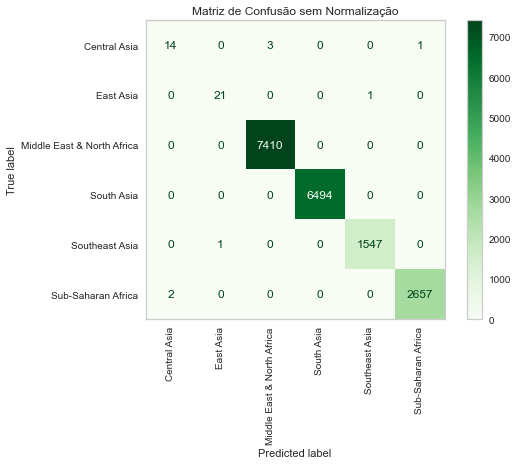

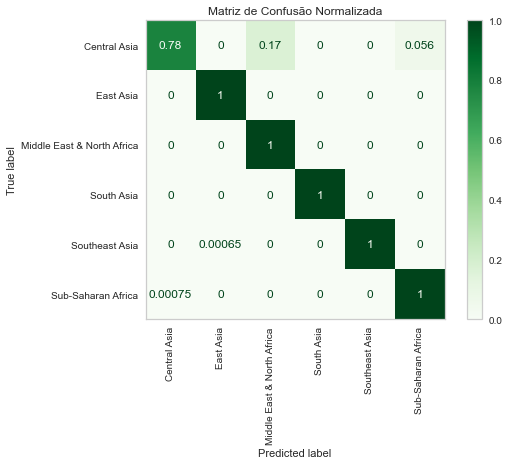

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
np.set_printoptions(precision=2)
titles_options = [
    ("Matriz de Confusão sem Normalização", None),
    ("Matriz de Confusão Normalizada", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        dtc_avaliacao.fit(X_avaliacao_treinamento, y_avaliacao_treinamento),
        X_avaliacao_teste,
        y_avaliacao_teste,
        cmap=plt.cm.Greens,
        normalize=normalize,
        xticks_rotation='vertical',
    )
    disp.ax_.set_title(title)
    plt.grid(False)
    print(title)
    print(disp.confusion_matrix)

plt.show()

In [41]:
print(classification_report(y_avaliacao_teste, dtc_avaliacao_yteste))

                            precision    recall  f1-score   support

              Central Asia       0.88      0.78      0.82        18
                 East Asia       1.00      0.95      0.98        22
Middle East & North Africa       1.00      1.00      1.00      7410
                South Asia       1.00      1.00      1.00      6494
            Southeast Asia       1.00      1.00      1.00      1548
        Sub-Saharan Africa       1.00      1.00      1.00      2659

                  accuracy                           1.00     18151
                 macro avg       0.98      0.96      0.97     18151
              weighted avg       1.00      1.00      1.00     18151



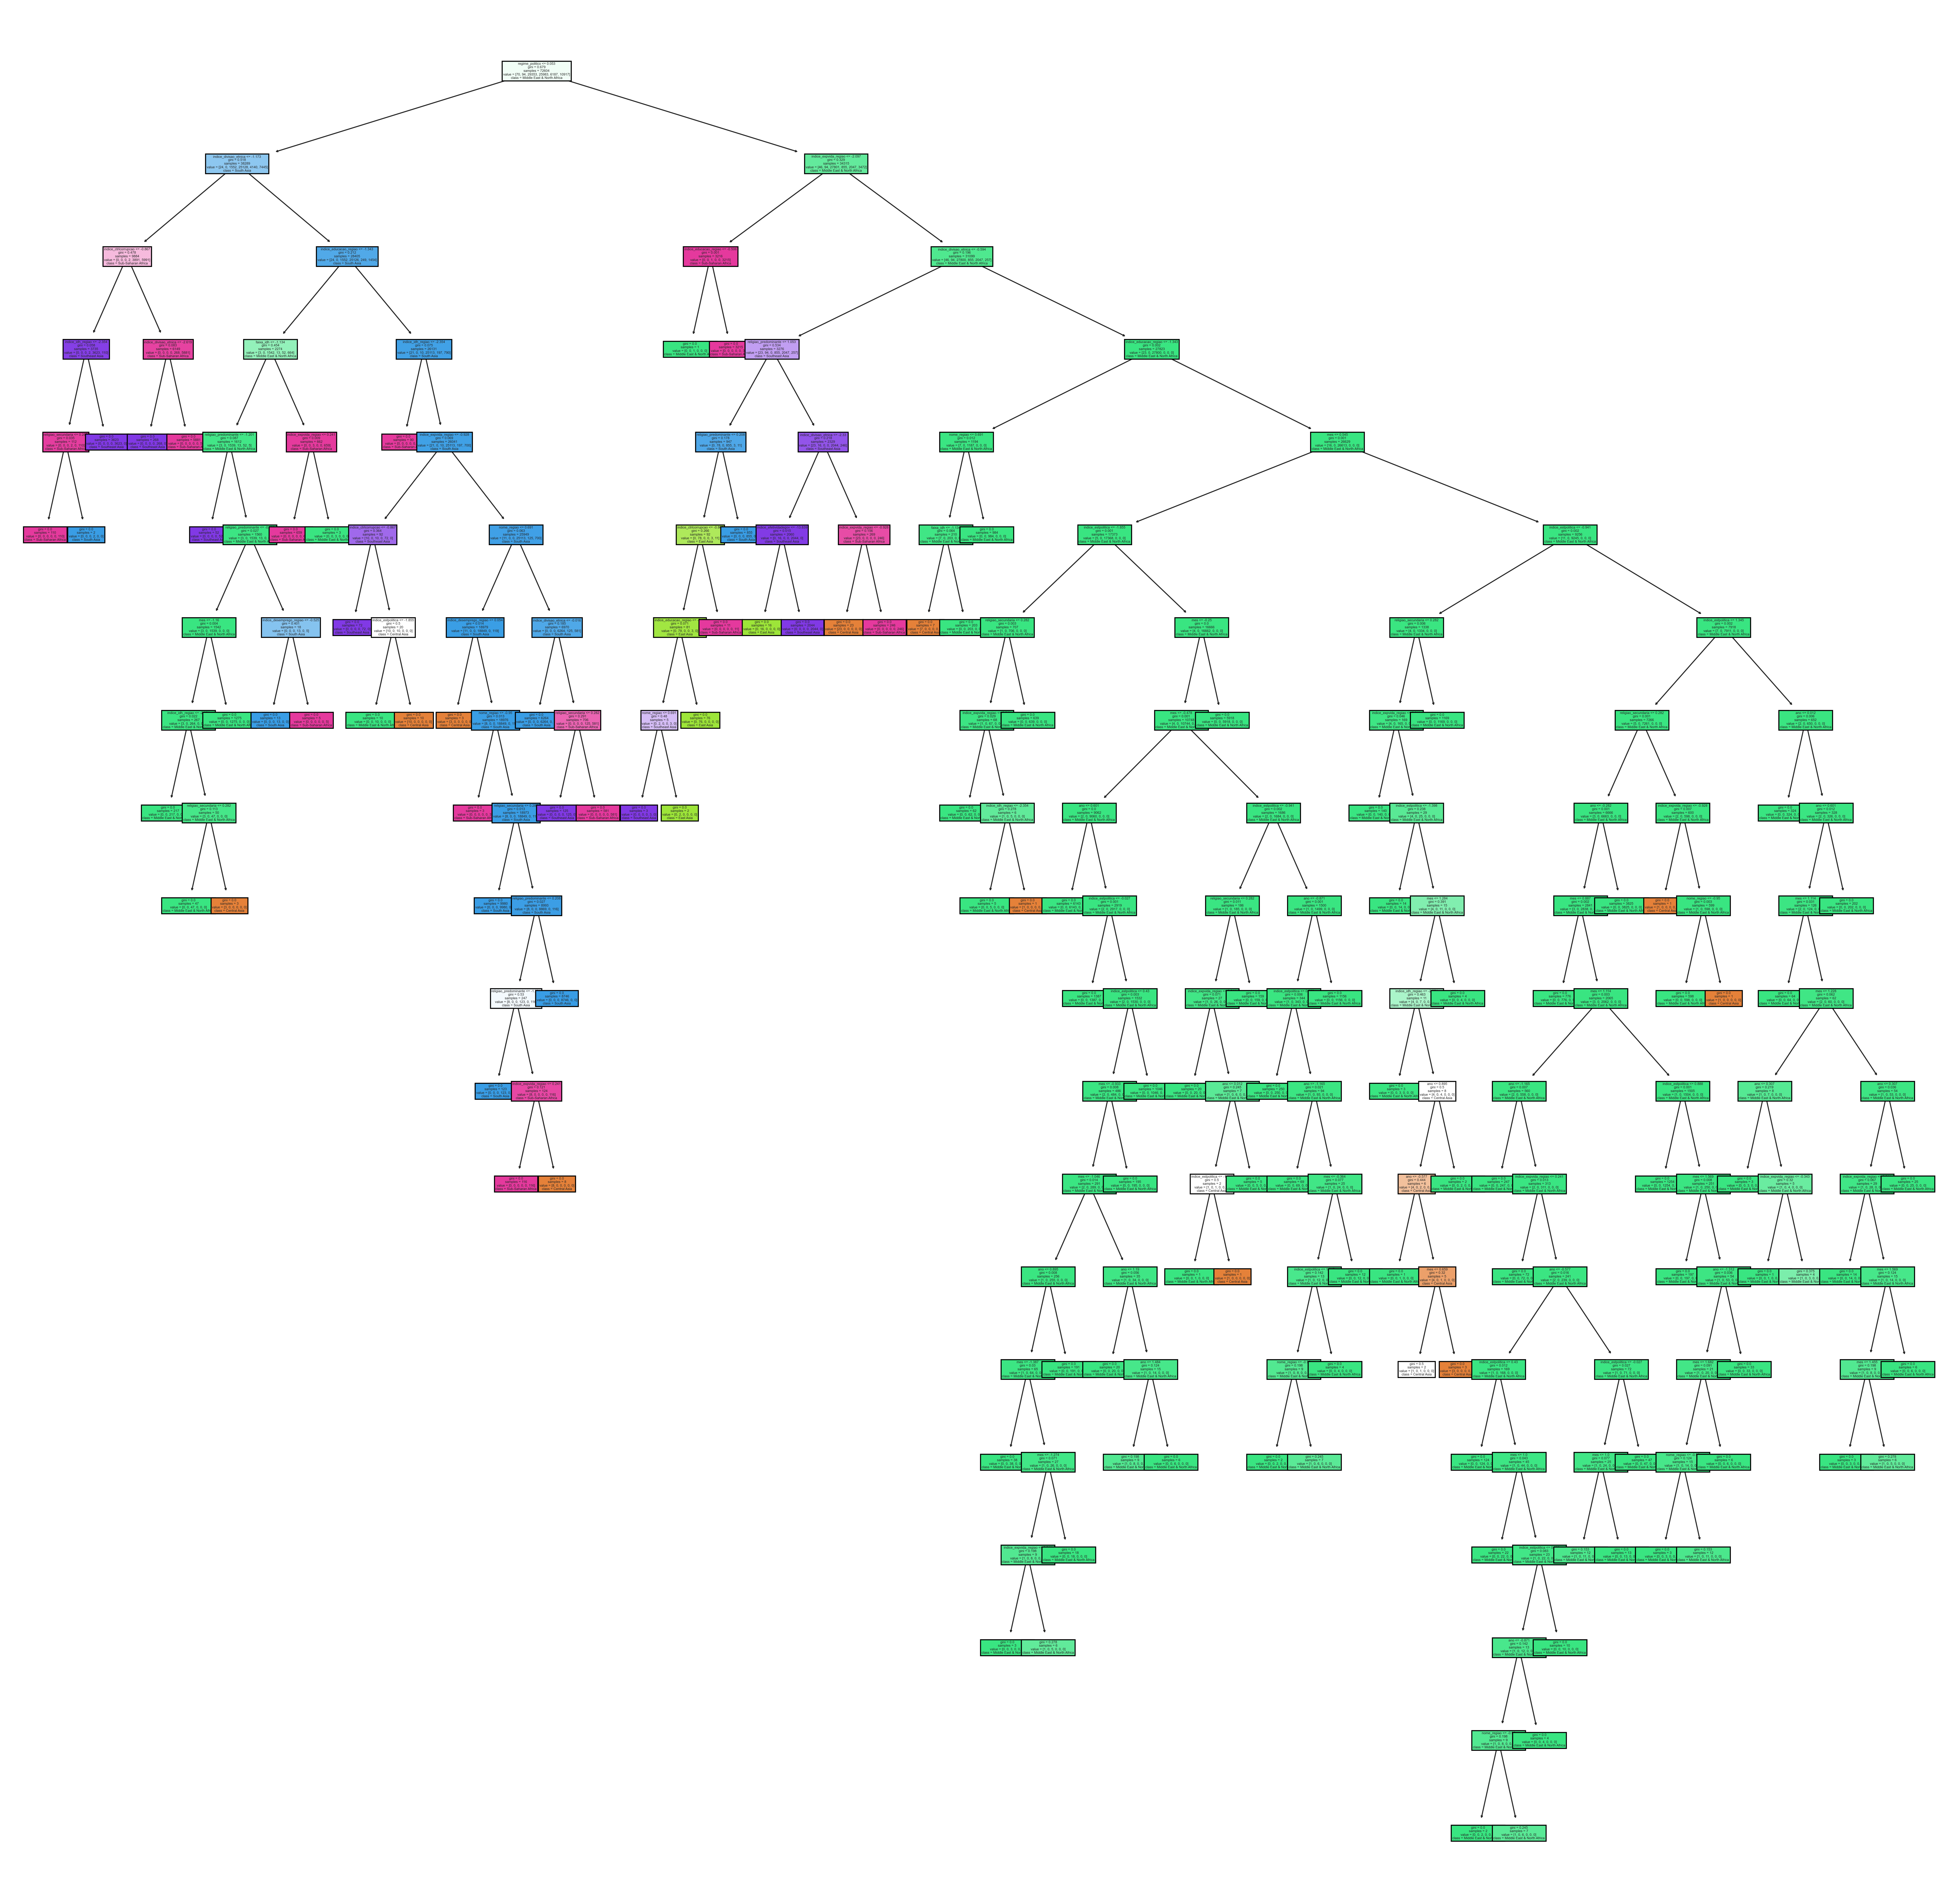

In [42]:
from sklearn import tree
previsores = ['nome_regiao', 'regime_politico','indice_divisao_etnica','religiao_predominante', 'religiao_secundaria', 'indice_desemprego_regiao', 'indice_educacao_regiao', 'indice_expvida_regiao', 'faixa_idh', 'indice_idh_regiao', 'indice_ctrlcorrupcao', 'indice_efetividadegov', 'indice_estpolitica', 'ano', 'mes', 'dia']
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (10,10), dpi=800)
tree.plot_tree(dtc_avaliacao, feature_names=previsores, class_names=['Central Asia','East Asia','Middle East & North Africa', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa'], filled=True);
fig.savefig('dtc_avaliacao_indicadores.png')

[Text(0.2689012096774194, 0.975, 'X[1] <= 0.053\ngini = 0.679\nsamples = 72604\nvalue = [70, 94, 29353, 25983, 6187, 10917]'),
 Text(0.11155913978494623, 0.925, 'X[2] <= -1.173\ngini = 0.518\nsamples = 38289\nvalue = [24, 0, 1552, 25128, 4140, 7445]'),
 Text(0.053763440860215055, 0.875, 'X[10] <= -0.867\ngini = 0.478\nsamples = 9884\nvalue = [0, 0, 0, 2, 3891, 5991]'),
 Text(0.03225806451612903, 0.825, 'X[9] <= -2.354\ngini = 0.058\nsamples = 3735\nvalue = [0, 0, 0, 2, 3623, 110]'),
 Text(0.021505376344086023, 0.775, 'X[4] <= 0.282\ngini = 0.035\nsamples = 112\nvalue = [0, 0, 0, 2, 0, 110]'),
 Text(0.010752688172043012, 0.725, 'gini = 0.0\nsamples = 110\nvalue = [0, 0, 0, 0, 0, 110]'),
 Text(0.03225806451612903, 0.725, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0, 0]'),
 Text(0.043010752688172046, 0.775, 'gini = 0.0\nsamples = 3623\nvalue = [0, 0, 0, 0, 3623, 0]'),
 Text(0.07526881720430108, 0.825, 'X[2] <= -2.619\ngini = 0.083\nsamples = 6149\nvalue = [0, 0, 0, 0, 268, 5881]'),
 T

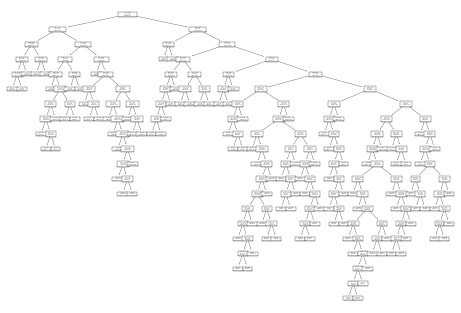

In [43]:
tree.plot_tree(dtc_avaliacao)

In [44]:
text_representation = tree.export_text(dtc_avaliacao)
print(text_representation)

|--- feature_1 <= 0.05
|   |--- feature_2 <= -1.17
|   |   |--- feature_10 <= -0.87
|   |   |   |--- feature_9 <= -2.35
|   |   |   |   |--- feature_4 <= 0.28
|   |   |   |   |   |--- class: Sub-Saharan Africa
|   |   |   |   |--- feature_4 >  0.28
|   |   |   |   |   |--- class: South Asia
|   |   |   |--- feature_9 >  -2.35
|   |   |   |   |--- class: Southeast Asia
|   |   |--- feature_10 >  -0.87
|   |   |   |--- feature_2 <= -2.62
|   |   |   |   |--- class: Southeast Asia
|   |   |   |--- feature_2 >  -2.62
|   |   |   |   |--- class: Sub-Saharan Africa
|   |--- feature_2 >  -1.17
|   |   |--- feature_6 <= -1.34
|   |   |   |--- feature_8 <= -1.13
|   |   |   |   |--- feature_3 <= -1.20
|   |   |   |   |   |--- class: Southeast Asia
|   |   |   |   |--- feature_3 >  -1.20
|   |   |   |   |   |--- feature_3 <= -0.64
|   |   |   |   |   |   |--- feature_14 <= -1.16
|   |   |   |   |   |   |   |--- feature_9 <= -2.35
|   |   |   |   |   |   |   |   |--- class: Middle East & North Af

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc_avaliacao = RandomForestClassifier()
rfc_avaliacao.fit(X_avaliacao_treinamento, y_avaliacao_treinamento)

#previsoes
rfc_avaliacao_yteste       = rfc_avaliacao.predict(X_avaliacao_teste)      #previsores de teste
rfc_avaliacao_ytreinamento = rfc_avaliacao.predict(X_avaliacao_treinamento)#previsores de treinamento

In [47]:
print('Acurácia dos dados de Treinamento: {}'.format(accuracy_score(y_avaliacao_treinamento, rfc_avaliacao_ytreinamento)))
print('Acurácia dos dados de Teste: {}'.format(accuracy_score(y_avaliacao_teste, rfc_avaliacao_yteste)))

Acurácia dos dados de Treinamento: 0.9998760398876095
Acurácia dos dados de Teste: 0.9997796264668614


Matriz de Confusão sem Normalização
[[  14    1    3    0    0    0]
 [   0   22    0    0    0    0]
 [   0    0 7410    0    0    0]
 [   0    0    0 6494    0    0]
 [   0    0    0    0 1548    0]
 [   0    0    1    0    0 2658]]
Matriz de Confusão Normalizada
[[0.78 0.   0.17 0.   0.   0.06]
 [0.   1.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   1.  ]]


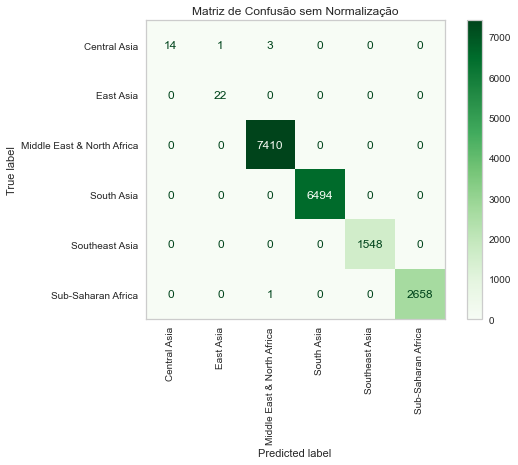

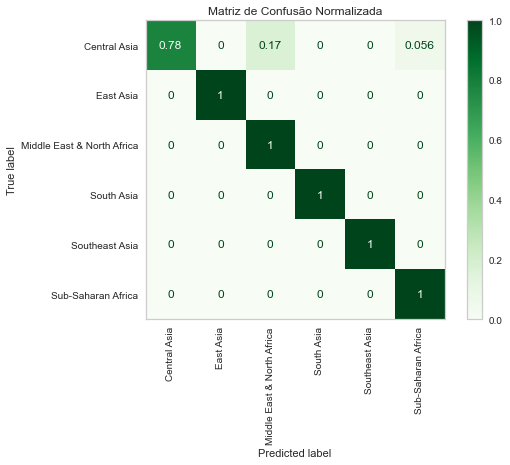

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
np.set_printoptions(precision=2)
titles_options = [
    ("Matriz de Confusão sem Normalização", None),
    ("Matriz de Confusão Normalizada", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        rfc_avaliacao.fit(X_avaliacao_treinamento, y_avaliacao_treinamento),
        X_avaliacao_teste,
        y_avaliacao_teste,
        cmap=plt.cm.Greens,
        normalize=normalize,
        xticks_rotation='vertical',
    )
    disp.ax_.set_title(title)
    plt.grid(False)
    print(title)
    print(disp.confusion_matrix)

plt.show()

In [49]:
print(classification_report(y_avaliacao_teste, rfc_avaliacao_yteste))

                            precision    recall  f1-score   support

              Central Asia       1.00      0.78      0.88        18
                 East Asia       1.00      1.00      1.00        22
Middle East & North Africa       1.00      1.00      1.00      7410
                South Asia       1.00      1.00      1.00      6494
            Southeast Asia       1.00      1.00      1.00      1548
        Sub-Saharan Africa       1.00      1.00      1.00      2659

                  accuracy                           1.00     18151
                 macro avg       1.00      0.96      0.98     18151
              weighted avg       1.00      1.00      1.00     18151



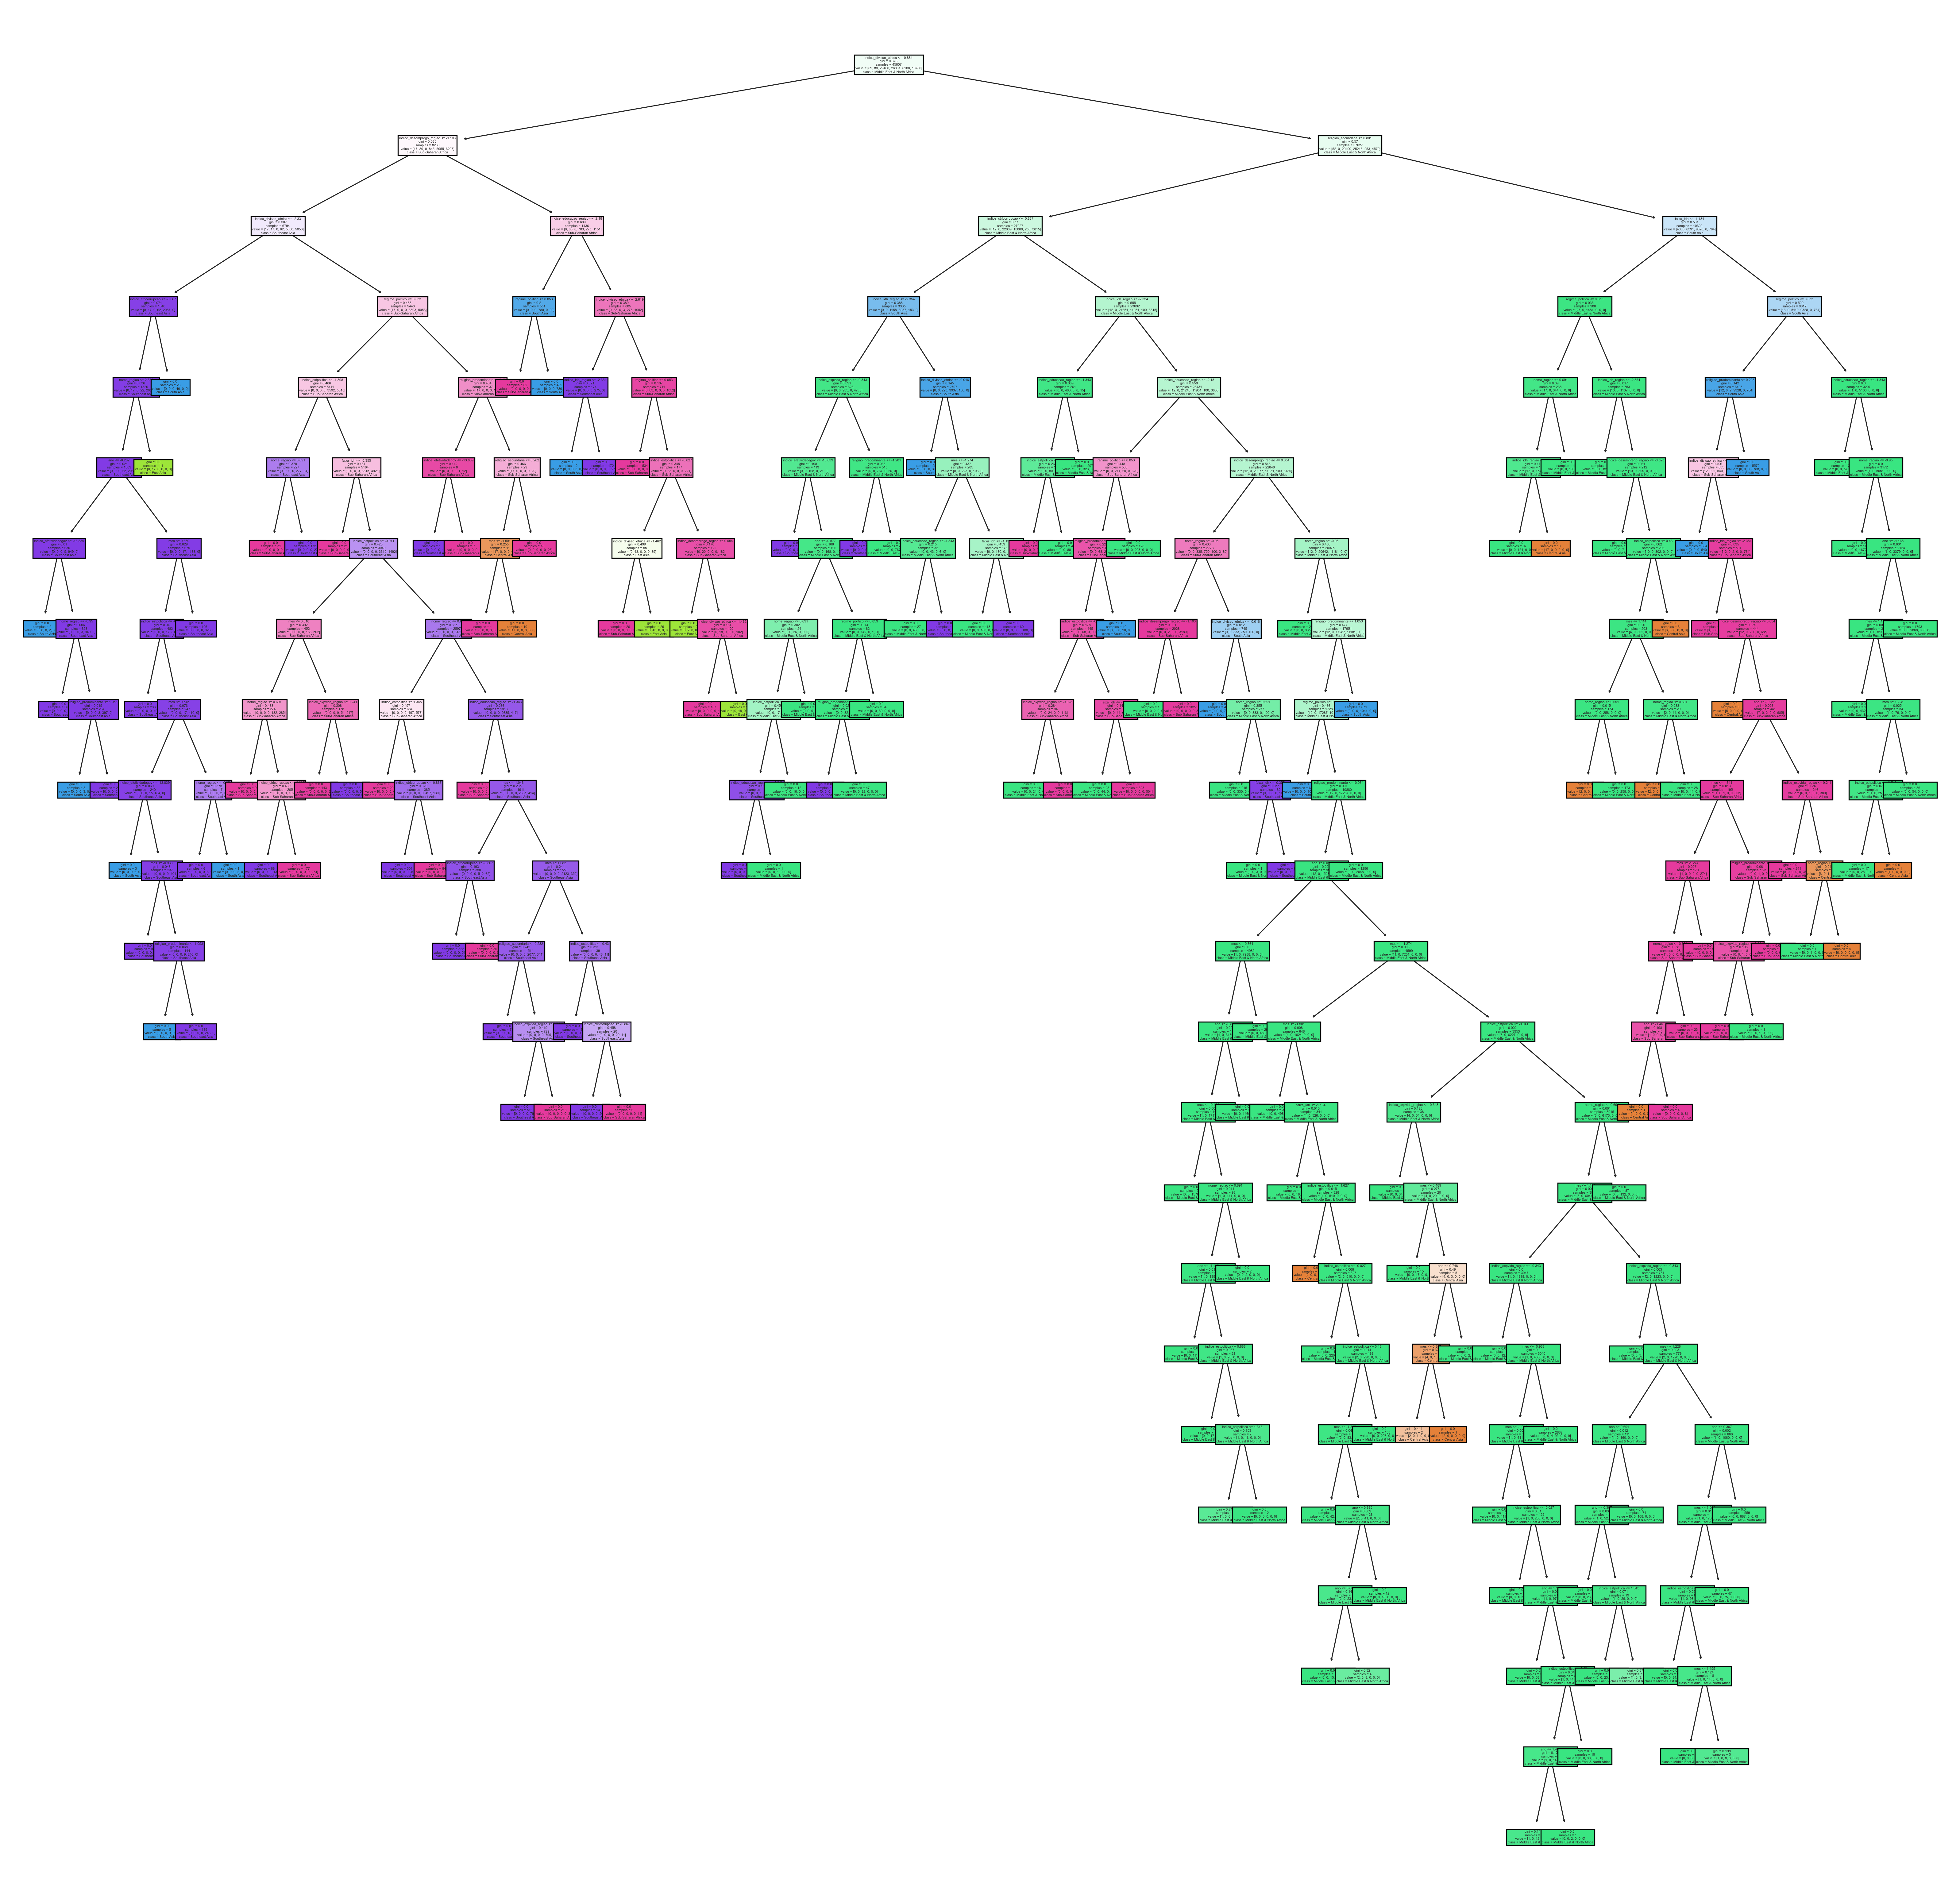

In [50]:
from sklearn.tree import plot_tree
rfc_previsores = ['nome_regiao', 'regime_politico','indice_divisao_etnica','religiao_predominante', 'religiao_secundaria', 'indice_desemprego_regiao', 'indice_educacao_regiao', 'indice_expvida_regiao', 'faixa_idh', 'indice_idh_regiao', 'indice_ctrlcorrupcao', 'indice_efetividadegov', 'indice_estpolitica', 'ano', 'mes', 'dia']
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (10,10), dpi=800)
tree.plot_tree(rfc_avaliacao.estimators_[0], feature_names=rfc_previsores, class_names=['Central Asia','East Asia','Middle East & North Africa', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa'], filled=True);
fig.savefig('rfc_avaliacao_indicadores.png')

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn_avaliacao = KNeighborsClassifier()
knn_avaliacao.fit(X_avaliacao_treinamento, y_avaliacao_treinamento)

#previsoes
knn_avaliacao_yteste       = knn_avaliacao.predict(X_avaliacao_teste)      #previsores de teste
knn_avaliacao_ytreinamento = knn_avaliacao.predict(X_avaliacao_treinamento)#previsores de treinamento

In [53]:
print('Acurácia dos dados de Treinamento: {}'.format(accuracy_score(y_avaliacao_treinamento, knn_avaliacao_ytreinamento)))
print('Acurácia dos dados de Teste: {}'.format(accuracy_score(y_avaliacao_teste, knn_avaliacao_yteste)))

Acurácia dos dados de Treinamento: 0.9991598259049088
Acurácia dos dados de Teste: 0.999008319100876


Matriz de Confusão sem Normalização
[[  11    0    4    0    0    3]
 [   0   22    0    0    0    0]
 [   0    0 7409    0    0    1]
 [   0    0    1 6491    2    0]
 [   0    0    4    0 1544    0]
 [   0    0    1    2    0 2656]]
Matriz de Confusão Normalizada
[[6.11e-01 0.00e+00 2.22e-01 0.00e+00 0.00e+00 1.67e-01]
 [0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 1.35e-04]
 [0.00e+00 0.00e+00 1.54e-04 1.00e+00 3.08e-04 0.00e+00]
 [0.00e+00 0.00e+00 2.58e-03 0.00e+00 9.97e-01 0.00e+00]
 [0.00e+00 0.00e+00 3.76e-04 7.52e-04 0.00e+00 9.99e-01]]


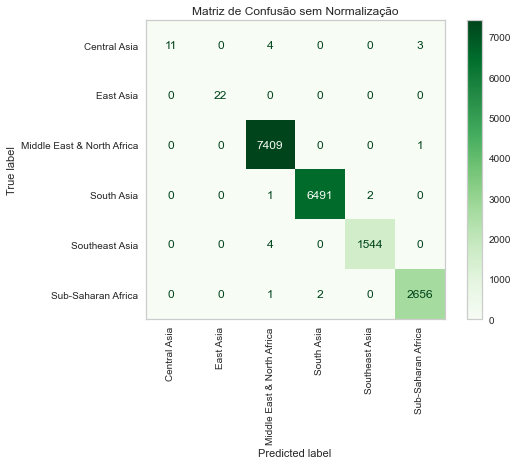

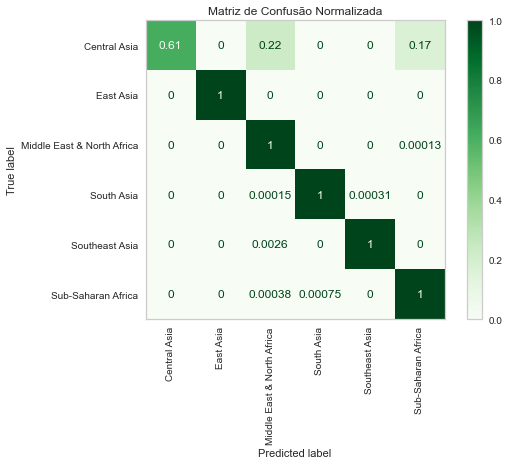

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
np.set_printoptions(precision=2)
titles_options = [
    ("Matriz de Confusão sem Normalização", None),
    ("Matriz de Confusão Normalizada", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        knn_avaliacao.fit(X_avaliacao_treinamento, y_avaliacao_treinamento),
        X_avaliacao_teste,
        y_avaliacao_teste,
        cmap=plt.cm.Greens,
        normalize=normalize,
        xticks_rotation='vertical',
    )
    disp.ax_.set_title(title)
    plt.grid(False)
    print(title)
    print(disp.confusion_matrix)

plt.show()

In [55]:
print(classification_report(y_avaliacao_teste, knn_avaliacao_yteste))

                            precision    recall  f1-score   support

              Central Asia       1.00      0.61      0.76        18
                 East Asia       1.00      1.00      1.00        22
Middle East & North Africa       1.00      1.00      1.00      7410
                South Asia       1.00      1.00      1.00      6494
            Southeast Asia       1.00      1.00      1.00      1548
        Sub-Saharan Africa       1.00      1.00      1.00      2659

                  accuracy                           1.00     18151
                 macro avg       1.00      0.93      0.96     18151
              weighted avg       1.00      1.00      1.00     18151

